## GRADED CHALLENGE 2

**NAMA  : ENGGAR KRISTIAN**\
**BATCH : 011**

*Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Linear Algebra dan Calculus.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from scipy.integrate import trapz

(438, 780, 3)


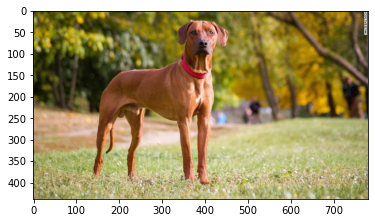

In [2]:
image = plt.imread('201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg')
plt.imshow(image)
print(image.shape)

In [3]:
image


array([[[ 86,  93,  39],
        [ 88,  93,  39],
        [ 87,  90,  33],
        ...,
        [ 48,  41,  15],
        [ 46,  39,  10],
        [ 59,  52,  23]],

       [[ 77,  84,  30],
        [ 77,  84,  30],
        [ 78,  83,  25],
        ...,
        [ 46,  39,  13],
        [ 64,  57,  29],
        [ 37,  30,   1]],

       [[ 64,  73,  20],
        [ 66,  73,  19],
        [ 68,  73,  17],
        ...,
        [ 56,  48,  25],
        [ 44,  37,   9],
        [ 70,  60,  33]],

       ...,

       [[165, 151, 106],
        [159, 144, 101],
        [151, 134,  91],
        ...,
        [150, 139,  85],
        [149, 138,  84],
        [145, 134,  80]],

       [[164, 149, 106],
        [157, 142,  99],
        [149, 131,  91],
        ...,
        [155, 143,  93],
        [153, 141,  89],
        [148, 136,  84]],

       [[164, 149, 108],
        [157, 142, 101],
        [146, 131,  90],
        ...,
        [160, 148, 100],
        [157, 145,  97],
        [150, 138,  90]]

In [4]:
image.shape

(438, 780, 3)

### Merubah gambar 3D jpg menjadi 2D

Menjadikan gambar menjadi RGB

In [136]:
Red = image[:,:,0]
Green = image[:,:,1]
Blue = image[:,:,2]

print('Shape R:',Red.shape)
print('Shape G:',Green.shape)
print('Shape B:',Blue.shape)

Shape R: (438, 780)
Shape G: (438, 780)
Shape B: (438, 780)


### Mengubah RGB menjadi Grayscale

Text(0.5, 1.0, 'grayscale dengan cmap')

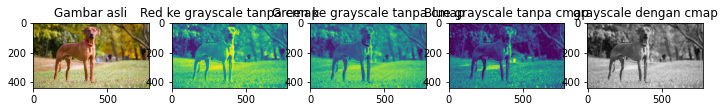

In [137]:
# konstanta Grayscale adalah 0.299*Red + 0.587*Green + 0.114*Blue
gray = 0.299*Red + 0.587*Green + 0.114*Blue
fig, ax = plt.subplots(ncols=5,figsize=(12,10))
ax[0].imshow(image)
ax[0].set_title('Gambar asli')
ax[1].imshow(Red)
ax[1].set_title('Red ke grayscale tanpa cmap')
ax[2].imshow(Green)
ax[2].set_title('Green ke grayscale tanpa cmap')
ax[3].imshow(Blue)
ax[3].set_title('Blue grayscale tanpa cmap')
ax[4].imshow(gray, cmap='gray')
ax[4].set_title('grayscale dengan cmap')

### 1. Hitung vektor gradien (turunan parsial) masing-masing pixel untuk masing-masing sumbu x dan y dengan rumus dI/dX
### 2. Hitung gradient magnitude tiap pixel dengan rumus:

In [134]:
dx, dy, dz  = np.gradient(image) # Trunan 3-D array gambar asli
Rx, Ry      = np.gradient(image[:,:,0]) # Turunan image 2-D array dari warna Red
Gx, Gy      = np.gradient(image[:,:,1]) # Turunan image 2-D array dari warna Red
Bx, By      = np.gradient(image[:,:,2]) # Turunan image 2-D array dari warna Red
Grx, Gry    = np.gradient(gray) # Turunan image 2-D array dari warna Gray

grad_mag = np.sqrt(np.square(Rx) + np.square(Ry)) + np.sqrt(np.square(Gx) +        
            np.square(Gy)) + np.sqrt(np.square(Bx) + np.square(By)) + np.sqrt(np.square(Grx) + np.square(Gry))
grad_mag # menghitung Gradient Magnitude pada masing-masing array 2-D dari warna Red, Green, Blue, dan Gray

array([[ 36.23938947,  39.28012586,  34.25325842, ...,  12.6859219 ,
         75.94115937, 102.21545871],
       [ 40.742     ,  41.63954506,  35.7625628 , ...,  26.95525588,
         20.00557941, 110.78729361],
       [ 35.02588972,  36.35381195,  31.45579395, ..., 430.57860357,
         59.64062493, 127.15991461],
       ...,
       [ 24.60662997,  32.24448555,  37.68735801, ...,  11.22922348,
         12.36756688,  16.96634487],
       [ 28.18759456,  32.54896265,  33.09470263, ...,  22.07568129,
         23.5550357 ,  23.63277636],
       [ 28.28382205,  36.22243199,  35.04412484, ...,  22.42166318,
         28.93768703,  31.19811554]])

Text(0.5, 1.0, '$\\partial_y img$')

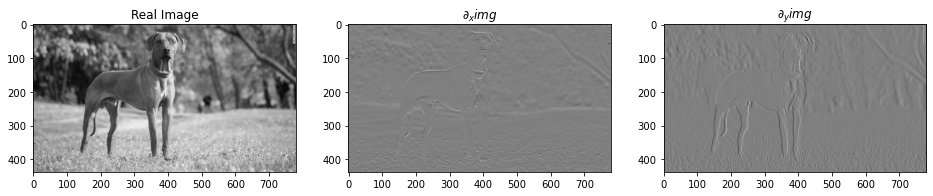

In [135]:
# Pengaplikasian turunan parsial pada sebuah gambar
fig, ax = plt.subplots(ncols=3,figsize=(16,5))

ax[0].imshow(gray, cmap='gray')
ax[0].set_title('Real Image')

ax[1].imshow(Grx, cmap='gray')
ax[1].set_title(r'$\partial_x img$')

ax[2].imshow(Gry, cmap='gray')
ax[2].set_title(r'$\partial_y img$')

In [138]:
grad_mag.shape

(438, 780)

setelah diturunkan vektor gradien, lalu disubtitusikan ke rumus yang telah diberikan untuk menghitung gradien magnitude, tetap akan didapatkan shampe yang sama yaitu 438, 780. turunan sebuah array 2D pada gambar akan menghasilkan gambar yang berbeda pada gambar awalnya untuk sumbu x dan y. 

3. Tentukan sebuah threshold?

In [12]:
# Import library untuk mencari threshold
import skimage.io
import skimage.color
import skimage.filters


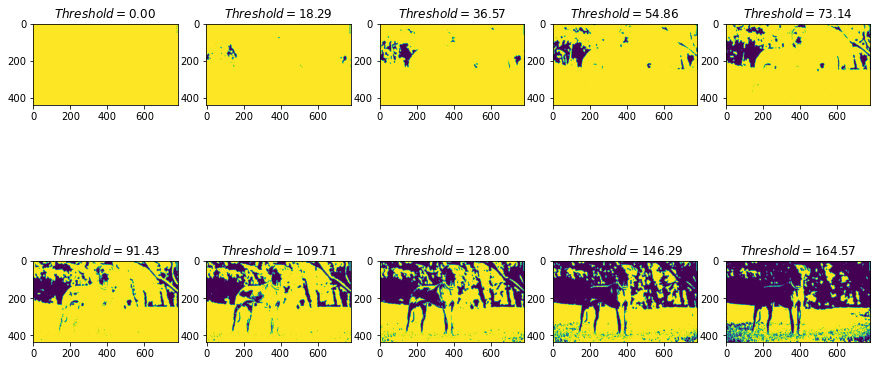

In [101]:
# Trial and error pada theshold untuk menjadi nilai acak
th_values = np.linspace(0, 256, 15)
fig, axis = plt.subplots(2,5, figsize=(15,8))

for th,ax in zip(th_values, axis.flatten()):
    binarized = Red > th
    ax.imshow(binarized)
    ax.set_title('$Threshold = %.2f$' % th)



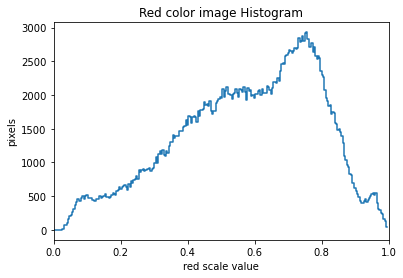

In [132]:
# Mencari sebuah grafik histogram pada Red dan menentukan binar 256 atau nilai maksimumnya
blurred_imageR = skimage.filters.gaussian(Red, sigma=1.0)
hist_red, bin_edges = np.histogram(blurred_imageR, bins=256, range=(0.0, 1.0))

# plot grafik histogram red scale value terhadap pixels
fig, ax = plt.subplots()
plt.step(bin_edges[0:-1], hist_red)
plt.title("Red color image Histogram")
plt.xlabel("red scale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)
plt.show()

threshold t = 90.


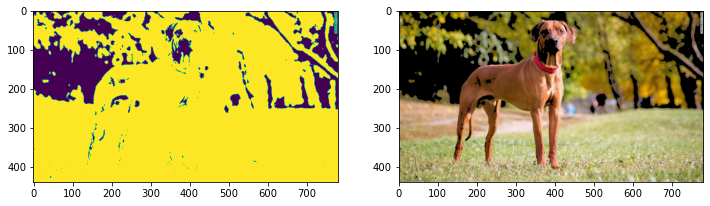

In [131]:
# mendefinisikan gambar Red untuk diaplikasikan theshold tersebut
def masked_image(image, mask):
    red_mask = Red * mask
    green_mask = Green * mask
    blue_mask = Blue * mask
    return np.dstack([red_mask,green_mask,blue_mask])

# Pengaplikasian theshold bernilai t=90
fig, ax = plt.subplots(1, 2, figsize=(12,6))

thresh = skimage.filters.threshold_otsu(Red)
t = 90
red_otsu = Red > t # di kasus ini saya memilih color scale lebih besar dari threshold
ax[0].imshow(red_otsu)

filtered = masked_image(Red, red_otsu)
ax[1].imshow(filtered)

print("threshold t = {}.".format(t)) 


threshold t = 128.


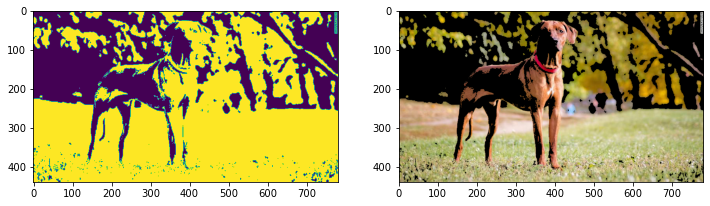

In [127]:
# Pengaplikasian theshold bernilai t=128
fig, ax = plt.subplots(1, 2, figsize=(12,6))

thresh = skimage.filters.threshold_otsu(Red)
t = 128
red_otsu = Red > t # di kasus ini saya memilih color scale lebih besar dari threshold
ax[0].imshow(red_otsu)

filtered = masked_image(Red, red_otsu)
ax[1].imshow(filtered)

print("threshold t = {}.".format(t)) 

threshold t = 165.


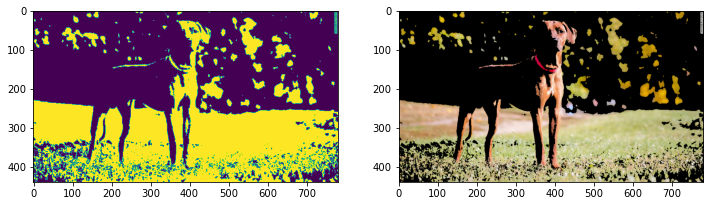

In [133]:
# Pengaplikasian theshold bernilai t=165
fig, ax = plt.subplots(1, 2, figsize=(12,6))

thresh = skimage.filters.threshold_otsu(Red)
t = 165
red_otsu = Red > t # di kasus ini saya memilih color scale lebih besar dari threshold
ax[0].imshow(red_otsu)

filtered = masked_image(Red, red_otsu)
ax[1].imshow(filtered)

print("threshold t = {}.".format(t)) 

setelah trial and error threshold untuk mencari nilai threshold secara acak, maka saya memutuskan mengambil 3 nilai berbeda yaitu 90, 128, dan 165 yang mana ke tiga nilai tersebut threshold yang mengubah image dengan visualisasi yang masih tetap jelas

### 4. Untuk operasi matriks, buat matriks dengan nilai apapun yang bersesuaian dengan ukuran gambar dan           sesuai dengan aturan perkalian matriks.


In [145]:
# Iterasi perkalian matriks pada 2D dan 3D array pada gambar
# perkalian matriks Red dengan Green
RG = Red * Green
# perkalian matriks Red dengan Blue
RB = Red * Blue
# perkalian matriks Green dengan Blue
GB = Red * Blue

print("Hasil kali matriks dot product Red@Green =", RG)
print("Memiliki shape = ", RG.shape)
print("-"*70)
print("\nHasil kali matriks dot product Red@Blue =", RB)
print("Memiliki shape = ", RB.shape)
print("-"*70)
print("\nHasil kali matriks dot product Green@Blue =", GB)
print("Memiliki shape = ", GB.shape)


Hasil kali matriks dot product Red@Green = [[ 62 248 150 ... 176   2 252]
 [ 68  68  74 ...   2  64  86]
 [ 64 210 100 ... 128  92 104]
 ...
 [ 83 112  10 ... 114  82 230]
 [116  22  63 ... 149  69 160]
 [116  22 182 ... 128 237 220]]
Memiliki shape =  (438, 780)
----------------------------------------------------------------------

Hasil kali matriks dot product Red@Blue = [[ 26 104  55 ... 208 204  77]
 [  6   6 158 ...  86  64  37]
 [  0 230 132 ... 120 140   6]
 ...
 [ 82 187 173 ... 206 228  80]
 [232 183 247 ...  79  49 144]
 [ 48 241  84 ... 128 125 188]]
Memiliki shape =  (438, 780)
----------------------------------------------------------------------

Hasil kali matriks dot product Green@Blue = [[ 26 104  55 ... 208 204  77]
 [  6   6 158 ...  86  64  37]
 [  0 230 132 ... 120 140   6]
 ...
 [ 82 187 173 ... 206 228  80]
 [232 183 247 ...  79  49 144]
 [ 48 241  84 ... 128 125 188]]
Memiliki shape =  (438, 780)


pada kali ini perkalian matriks hanya perkalian biasa menggunakan * bukan perkalian dot product menggunaka @, karena shape pada baris dan kolom yang berbeda

threshold t = 90.


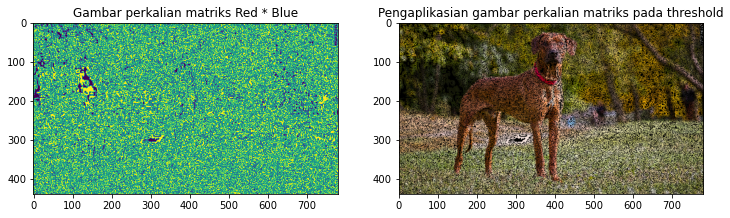

In [152]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
# Penerapan perkalian matriks Red * Blue pada threshold 90
thresh = skimage.filters.threshold_otsu(RB)
t = 90
RB_otsu = RB > t # di kasus ini saya memilih color scale lebih besar dari threshold
ax[0].imshow(RB_otsu)
ax[0].set_title("Gambar perkalian matriks Red * Blue")

filtered = masked_image(RB, RB_otsu)
ax[1].imshow(filtered)
ax[1].set_title("Pengaplikasian gambar perkalian matriks pada threshold")

print("threshold t = {}.".format(t)) 


threshold t = 128.


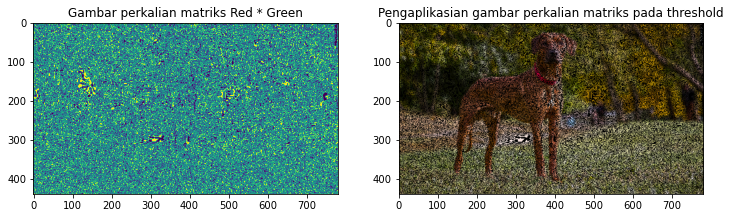

In [153]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
# Penerapan perkalian matriks Red * Blue pada threshold 90
thresh = skimage.filters.threshold_otsu(RG)
t = 128
RG_otsu = RG > t # di kasus ini saya memilih color scale lebih besar dari threshold
ax[0].imshow(RG_otsu)
ax[0].set_title("Gambar perkalian matriks Red * Green")

filtered = masked_image(RG, RG_otsu)
ax[1].imshow(filtered)
ax[1].set_title("Pengaplikasian gambar perkalian matriks pada threshold")

print("threshold t = {}.".format(t)) 


threshold t = 165.


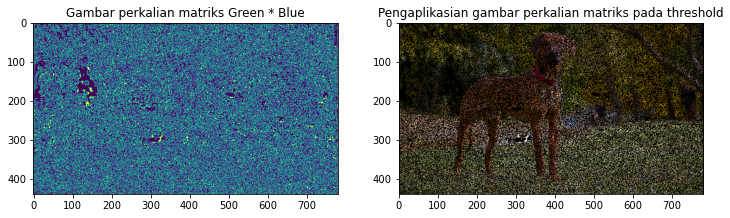

In [154]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
# Penerapan perkalian matriks Red * Blue pada threshold 90
thresh = skimage.filters.threshold_otsu(GB)
t = 165
GB_otsu = GB > t # di kasus ini saya memilih color scale lebih besar dari threshold
ax[0].imshow(GB_otsu)
ax[0].set_title("Gambar perkalian matriks Green * Blue")

filtered = masked_image(GB, GB_otsu)
ax[1].imshow(filtered)
ax[1].set_title("Pengaplikasian gambar perkalian matriks pada threshold")

print("threshold t = {}.".format(t)) 

Pengaplikasian matrik perkalian Red dan Blue, Red dan Green, serta Green dan Blue, menghasilkan visualisasi yang berbeda tetapi kontur gambar yang sama seperti berbintik hitam dan blur dikarenakan 2D Array di antara 2 matriks warna 2D dikalikan, sehingga menghasilkan gambar dan warna yang berbintik. 